# scikit-FIBERS Example Code

## Installation and Imports 
How to setup and use scikit-FIBERS

In [1]:
# !pip uninstall scikit-fibers --yes 

In [2]:
import os
import pickle
import pandas as pd
from skfibers import FIBERS
from lifelines import CoxPHFitter
from skfibers.experiments.datagen import create_data_simulation_bin
from skfibers.experiments.datagen_evolvable_threshold import create_data_simulation_bin_evolve
from sklearn.metrics import classification_report

## Creating Simulation Data by provided functionality

In [3]:
data = create_data_simulation_bin_evolve(number_of_instances=1000, number_of_features=75, number_of_features_in_bin=10,
                                  no_fail_proportion=0.5, mm_frequency_range=(0.4, 0.5), noise_frequency=0.0,
                                  class0_time_to_event_range=(1.5, 0.2), class1_time_to_event_range=(1, 0.2),
                                  censoring_frequency=0.5, random_seed=42, negative=False, threshold=2)
if not os.path.exists('run_history/'):
    os.makedirs('run_history/')
data.to_csv('run_history/' + 'sampledata.csv', index=False)
data = pd.read_csv('run_history/' + 'sampledata.csv')
true_risk_group = data[['TrueRiskGroup']]
data = data.drop('TrueRiskGroup', axis=1)

## Assessment Functions

In [4]:
def save_fibers_object(fibers):
    if not os.path.exists('run_history/'):
        os.makedirs('run_history/')
    with open('run_history/' + 'adaptive_' + str(fibers.adaptable_threshold) +
              '_evolving_prob_' + str(fibers.evolving_probability) +
              '_thresh_' + str(fibers.threshold) + '.pickle', 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(fibers, outp, pickle.HIGHEST_PROTOCOL)

## Running Evaluation

### Adaptable FIBERS

In [5]:
fibers = FIBERS(label_name="Censoring", duration_name="Duration", 
                given_starting_point=False, start_point_feature_list=None, feature_bins_start_point=None,
                iterations=100, set_number_of_bins=50, 
                min_features_per_group=2, max_number_of_groups_with_feature=4,
                informative_cutoff=0.2, crossover_probability=0.5, 
                mutation_probability=0.4, elitism_parameter=0.8,
                mutation_strategy="Regular", random_seed=None, 
                set_threshold=0, evolving_probability=1,
                min_threshold=0, max_threshold=3, merge_probability=1, 
                adaptable_threshold=True, covariates=None,
                scoring_method="log_rank")
fibers = fibers.fit(data)

100%|█████████████████████████████████████████| 100/100 [00:12<00:00,  7.94it/s]


#### Saving FIBERS Object

In [6]:
save_fibers_object(fibers)

#### Summary of Top Bin Statistics

In [7]:
bin_summary, logrank_results = fibers.get_bin_summary(save='run_history/' + 'adaptive_' + str(fibers.adaptable_threshold) +
              '_evolving_prob_' + str(fibers.evolving_probability) + '_thresh_' + str(fibers.threshold) 
              + '_bin_summary.csv')
logrank_results

,0
Bin #,Bin 1
Top Bin of Features:,"['P_7', 'P_8', 'P_4', 'P_5']"
Log-Rank Score,119.582145
Number of Instances with No Mismatches in Bin:,717
Number of Instances with Mismatch(es) in Bin:,283
p-value from Log Rank Test:,0.0
Threshold,1


#### All Bins and coressponding Log-Rank Scores

In [8]:
score_df = fibers.get_bin_scores(save='run_history/' + 'adaptive_' + str(fibers.adaptable_threshold) +
              'evolving_prob_' + str(fibers.evolving_probability) + '_thresh_' + str(fibers.threshold) 
              + 'bin_scores.csv')
# scores_df

In [9]:
accuracy_list = [fibers.score(data, true_risk_group, i) for i in range(50)]
score_df['Accuracy'] = accuracy_list
score_df

,Bin #,Score,Bins,Threshold,High Risk Ratio,Accuracy
0,Bin 1,119.582145,"['P_7', 'P_8', 'P_4', 'P_5']",1,0.283,0.743
1,Bin 2,107.488416,"['P_5', 'P_10', 'P_2', 'P_7']",0,0.639,0.783
2,Bin 3,101.750696,"['P_5', 'P_7', 'P_2', 'R_37']",1,0.326,0.704
3,Bin 4,94.990327,"['P_3', 'P_5', 'P_2', 'R_49']",1,0.337,0.699
4,Bin 5,91.555042,"['R_22', 'P_1', 'P_6', 'R_65', 'P_5', 'P_7', '...",3,0.356,0.712
5,Bin 47,91.110742,"['R_10', 'P_9', 'P_2', 'P_5', 'P_1', 'R_44']",2,0.306,0.704
6,Bin 6,91.023741,"['R_38', 'P_5', 'P_1']",1,0.224,0.652
7,Bin 7,90.494943,"['R_42', 'P_7', 'P_1', 'P_3']",1,0.350,0.732
8,Bin 8,89.404821,"['P_5', 'P_1', 'P_6', 'R_65']",1,0.342,0.720
9,Bin 9,88.476891,"['P_6', 'P_3', 'P_2', 'R_4']",1,0.345,0.725


#### Viewing Kaplan Meier Survival Plot

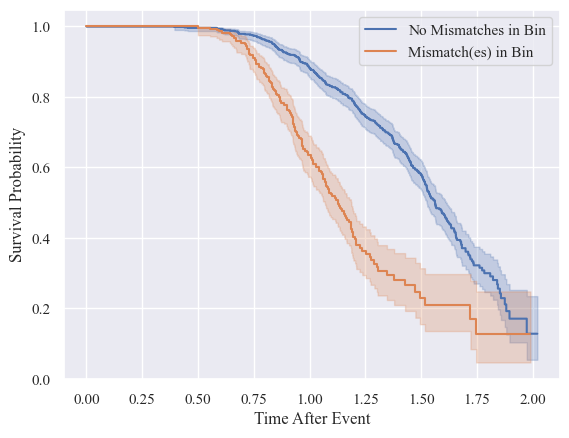

In [10]:
fibers.get_bin_survival_plot(show=True, save='run_history/' + 'adaptive_' + str(fibers.adaptable_threshold) +
              'evolving_prob_' + str(fibers.evolving_probability) + '_thresh_' + str(fibers.threshold) 
              + 'survival_plot.png')

#### Checking Top Rule Train Accuracy

In [11]:
print("Accuracy: ", fibers.score(data, true_risk_group))

Accuracy:  0.743


In [12]:
y = fibers.predict(data)
print(classification_report(y, true_risk_group))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79       717
           1       0.53      0.93      0.67       283

    accuracy                           0.74      1000
   macro avg       0.74      0.80      0.73      1000
weighted avg       0.84      0.74      0.76      1000

